# Analisando dados de acidentes no DF em 2024

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [3]:
df = pd.read_csv('datatran2024.csv', sep=';', encoding='ISO-8859-1')

In [4]:
ac_df = df[df['uf'] == 'DF']
ac_df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
263,573425.0,2024-01-08,segunda-feira,18:00:00,DF,20,13,BRASILIA,Acumulo de água sobre o pavimento,Saída de leito carroçável,...,0,1,0,0,1,"-15,638752","-47,749599",SPRF-DF,DEL02-DF,UOP01-DEL02-DF
358,573852.0,2024-01-10,quarta-feira,20:00:00,DF,80,13,BRASILIA,Pista esburacada,Colisão frontal,...,0,1,0,1,2,"-15,728034","-48,193768",SPRF-DF,DEL03-DF,UOP02-DEL03-DF
1194,577831.0,2024-01-29,segunda-feira,13:33:00,DF,20,28,BRASILIA,Ausência de reação do condutor,Colisão traseira,...,0,8,0,2,2,"-15,598319","-47,621925",SPRF-DF,DEL02-DF,UOP01-DEL02-DF
1475,578961.0,2024-02-04,domingo,16:20:00,DF,20,11,BRASILIA,Chuva,Tombamento,...,0,1,0,1,1,"-15,64654","-47,766422",SPRF-DF,DEL02-DF,UOP01-DEL02-DF
1947,581270.0,2024-02-15,quinta-feira,09:40:00,DF,251,7,BRASILIA,Acessar a via sem observar a presença dos outr...,Colisão transversal,...,0,1,3,1,5,"-15,998561","-47,565559",SPRF-DF,DEL01-DF,UOP01-DEL01-DF


In [5]:
ac_df.info(max_cols=30)

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 263 to 35038
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      515 non-null    float64
 1   data_inversa            515 non-null    object 
 2   dia_semana              515 non-null    object 
 3   horario                 515 non-null    object 
 4   uf                      515 non-null    object 
 5   br                      515 non-null    int64  
 6   km                      515 non-null    object 
 7   municipio               515 non-null    object 
 8   causa_acidente          515 non-null    object 
 9   tipo_acidente           515 non-null    object 
 10  classificacao_acidente  515 non-null    object 
 11  fase_dia                515 non-null    object 
 12  sentido_via             515 non-null    object 
 13  condicao_metereologica  515 non-null    object 
 14  tipo_pista              515 non-null    obj

### Limpando e convertendo os dados

In [6]:
ac_df = ac_df.replace(',', '.', regex=True)
ac_df = ac_df[['latitude', 'longitude']].astype('float')


### Criando mapa de calor para ver maior índice de acidentes

In [7]:
mapa = folium.Map(location=[-15.7801, -47.9292], zoom_start=10.4)
dados_heatmap = ac_df[['latitude', 'longitude']].values.tolist()
HeatMap(dados_heatmap).add_to(mapa)
mapa.save('mapa_calor.html')


### Observando as fases do dia em acontecem os acidentes

In [39]:
df = df[df['uf'] == 'DF']
df_fasedia = df.groupby(['municipio', 'fase_dia']).size()

<AxesSubplot: xlabel='municipio,fase_dia'>

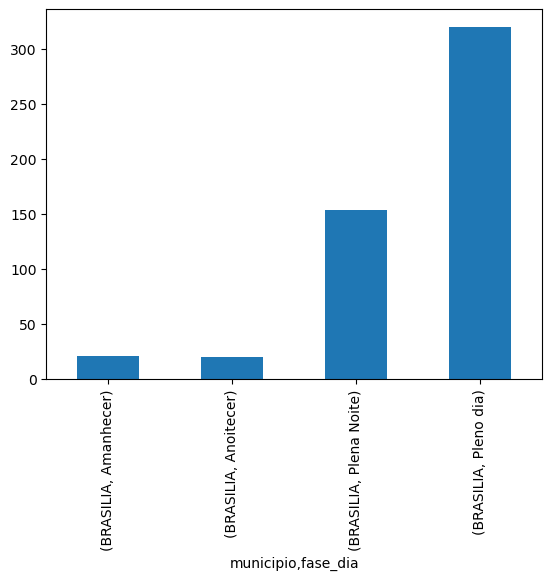

In [37]:
df_fasedia.plot(kind='bar')

In [59]:
df_causas = df.groupby(['municipio', 'fase_dia', 'causa_acidente']).size()
df_causas = df_causas.reset_index()
df_causas = df_causas.rename(columns={0:'quantidade'})
df_causas.to_excel('df_causas.xlsx', index=False)
df_causas

,municipio,fase_dia,causa_acidente,quantidade
0,BRASILIA,Amanhecer,Acessar a via sem observar a presença dos outr...,4
1,BRASILIA,Amanhecer,Animais na Pista,1
2,BRASILIA,Amanhecer,Ausência de reação do condutor,4
3,BRASILIA,Amanhecer,Condutor Dormindo,1
4,BRASILIA,Amanhecer,Condutor deixou de manter distância do veículo...,1
...,...,...,...,...
75,BRASILIA,Pleno dia,Transitar na contramão,1
76,BRASILIA,Pleno dia,Transitar no Acostamento,2
77,BRASILIA,Pleno dia,Ultrapassagem Indevida,2
78,BRASILIA,Pleno dia,Velocidade Incompatível,5


### Observando quantiades de mortes e feridos em acidentes neste ano

In [68]:
df[['mortos', 'feridos']].sum()


mortos       9
feridos    568
dtype: int64